
# Imports & Configuration
* NumPy (for fast numerical computation) 
* Matplotlib (for graphing)
* time 


In [5]:
#####################################################
# General Imports and numpy / matplotlib configuration
#display figures in the notebook

import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

# set all numpy prints to just 3 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})   

%matplotlib inline 
%matplotlib notebook 

#stack overflow says calling a second time may prevent some graphics errors
%matplotlib notebook 


# Create several _NumPy_ Arrays of Points


In [6]:
# numpy.linspace returns a NumPy array containing num evenly 
#   spaced numbers over the specified interval.
timeAxis = np.linspace(0.0, 10.0, num=100)

# we can use it to specify an unchanging line too
zero = np.linspace(0, 0, num=100)

# numpy lets us run functions on arrays to create new arrays 
sineOfTime = np.sin(timeAxis)
halfTime = 0.5*timeAxis
difference = halfTime - sineOfTime

# Plot them using _Matplotlib_

<IPython.core.display.Javascript object>


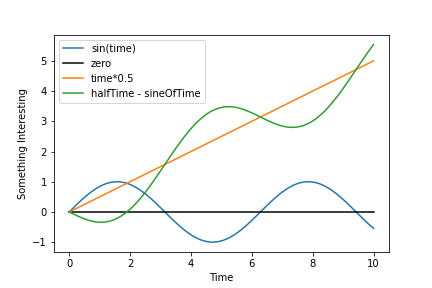

In [7]:
# The following line results in jupyter creating a brand new figure
# It's not really necessary the first time we create a figure, but 
# if you want subsequent figures to appear under their respective 
# cells you need to start with the following:
fig = plt.figure()

# We specify the x and y axes along with the label  
# The label appears when you show the legend
plt.plot(timeAxis, sineOfTime, label='sin(time)')

# there are many more arguments to matplotlib's plot method, e.g. here I use color
plt.plot(timeAxis, zero, label="zero", color="black")

# More of the same

plt.plot(timeAxis, halfTime, label="time*0.5")
plt.plot(timeAxis, difference, label="halfTime - sineOfTime")

# Labelling the x and y axes
plt.xlabel('Time')
plt.ylabel('Something Interesting')
plt.legend()

# Time Tick Simulator
So we can make time go faster


In [2]:
class TickSim:
    def __init__(self, timeStep=0.2, printTicks=False):
        # If timeStep == None then we'll run in real time
        
        self.timeStep = timeStep
        self.currentTime = None
        self.printTicks = printTicks
        self.tick()
        
              
        
    def tick(self):
        if self.timeStep:
            if self.currentTime != None: 
                # if we get here we've gone once
                self.currentTime += self.timeStep
            else:
                self.currentTime = 0
                
        else:
            self.currentTime = time.time()
            
        if self.printTicks:
            print("tick", self.currentTime)
            
        return self.currentTime
            
        
                       
    def getTime(self):
        return self.currentTime
    

# Proportional Controller Example


Even though Python doesn't have real constants, I'm going to use the prefix "CONST" plus all caps as a naming convention that these things shouldn't be changing!!

In [26]:
#A simple Proportional controller.
class Simple_P_Controller:

    def __init__(self, Kp=1.0, reference=0, sampleDuration=0.1):
        """
        * Kp:        the value for the proportional gain Kp
        * reference:  the initial reference (aka setpoint) value that the controller will try to achieve
        * sampleDuration: the time in seconds which the controller should wait before generating
                     a new output value. The PID works best when it is constantly called (eg. during a
                     loop), but with a sample time set so that the time difference between each update is
                     (close to) constant. If set to None, the PID will compute a new output value every time
                     it is called.
        
        """
        
        self.Kp = Kp
        self.reference = reference
        self.sampleDuration = sampleDuration
        self.previousTime = None
        self.previousOutput = None
        self.previousMeasuredValue = None
        
        
        

    def update(self, measuredValue, currentTime, printDebug=False):
        """
        Update the PID controller.

        Call the PID controller with the actual measured value (as opposed to the reference value we are
        aiming for).
        
        If sample_time seconds has passed since the last update
             then calculate and return the appropriate control value
        otherwise
             return the previous output instead (or None if no value has been calculated yet).

        """

        now = currentTime
        if self.previousTime:  
            # If we get here we know we've run this function at least once
            timeDiff = now - self.previousTime
            if timeDiff < self.sampleDuration:   
                # If we get here it's too early to compute a new output so just use the old one
                return self.previousOutput
        
        
        
        
        # Compute error term
        error = self.reference - measuredValue
        
        # Since we're only doing proportional control, the output is simple
        output = self.Kp * error
                
        if printDebug:
            print ("measured value:", measuredValue)
            print ("reference goal:", self.reference)
            print ("KP", self.Kp)
            print ("error", error)
            print ("output", output)
            print ("--------------------------------------")
        
            

        # Keep track of state
        self.previousOutput = output
        self.previousMeasuredValue = measuredValue
        self.previousTime = now

        return output
 


# Vehicle 2D class 
Moves forwards and backwards on a centimeter "number line"

In [27]:
class Vehicle2D:
    """
    Simple simulation of a robot vehicle that can only move forward or backward on a centimeter "number line"
    
    The vehicle moves at a speed directly proportional to the motor power, so if the motor is set to 
    30 then the vehicle moves 30 cm/second forwards, and if it is set to -30 it moves 30cm/second backwards
    
    The motor can not achieve a power higher than maxPower (or lower than negative maxPower)
    
    Setting the motor to a value between negative minPower and positive minPower results in the vehicle not 
    moving at all (because the motors don't have the power to fight inertia). So behind the scenes in the code
    if the motor is set to one of those values it behaves as though it was set to zero. 
    
    The vehicle never coasts - the speed is always directly related to the motor speed.
    
    A few examples - suppose that maxPower is 100 and minPower is 20 then
    
    Motor Power        Actual Vehicle Speed
        35                      35 cm/s
        100                    100 cm/s
        15                       0 cm/s
        -19                      0 cm/s
        120                    100 cm/s
        -54                    -54 cm/s  (i.e. 54 cm/s but backwards)
        -132                   -100 cm/s
   
    """

    def __init__(self, initialPosition, minPower = 20, maxPower = 100):
        self.position = initialPosition
        self.minPower = minPower
        self.maxPower = maxPower       
        
    def getPosition(self):
        return self.position

    # see discussion of how this works above
    def powerToSpeed(self, power):
        if power < -1 * self.maxPower:
            return -1 * self.maxPower
        elif power < -1* self.minPower:
            return power
        elif power <= self.minPower:
            return 0
        elif power <= self.maxPower:
            return power
        else:
            return self.maxPower
    
    def update(self, power, dt):
        speed = self.powerToSpeed(power)
        self.position = self.position + (dt * speed)
        return self.position


# Let's use our P-Controller to Move the car to a goal that never moves
(and plot the resulting position)

<IPython.core.display.Javascript object>


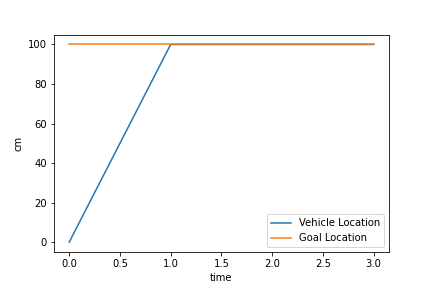

In [31]:
def controlCar(initialPosition=0, # car initial position
                referencePosition=100, # car goal position
                KProportional=3, # P Constant
                samplePeriodInSeconds=0.01, # how long the P-controller should wait before generating a new value
                howLong = 3,    # how long this simulation should run
                clockTickStep=0.2, # duration of one simulated clock "tick"
                minPow=20,  # for the car  - see above
                maxPow=100): # for the car - see above

    clockSimulator = TickSim(timeStep=clockTickStep)
    controller = Simple_P_Controller(Kp=KProportional, reference=referencePosition, sampleDuration=samplePeriodInSeconds)
    car = Vehicle2D(initialPosition, minPower = minPow, maxPower = maxPow)
    
    startTime = clockSimulator.getTime()
    previousTime = startTime

    
    # Set up some lists for plotting later and their initial values
    referenceVals = [referencePosition]
    locations = [car.getPosition()]
    powers = [0]
    speeds = [0]
    timeLine = [0]
    

    # run for howlong simulated seconds
    while clockSimulator.getTime() - startTime < howLong:
        currentTime = clockSimulator.tick()
        dt = currentTime - previousTime
    
        newPower = controller.update(car.getPosition(), currentTime)
        newLocation = car.update(newPower,dt)
       
        referenceVals.append(referencePosition)  # the CONST_REFERENCE_VAL never changes but we want a list of them for 
                                                # plotting purposes
        locations.append(newLocation)
        timeLine.append(currentTime - startTime)
        powers.append(newPower)
        previousTime = currentTime
    


    fig = plt.figure()
    plt.plot(timeLine, locations, label='Vehicle Location')
    plt.plot(timeLine, referenceVals, label = "Goal Location")
    #plt.plot(timeLine,powers, label="Speed")
    plt.xlabel("time")
    plt.ylabel("cm")
    plt.legend()

controlCar(initialPosition=0, # car initial position
                referencePosition=100, # car goal position
                KProportional=70, # P Constant
                samplePeriodInSeconds=0.01, # how long the P-controller should wait before generating a new value
                howLong = 3,    # how long this simulation should run
                clockTickStep=0.2, # duration of one simulated clock "tick"
                minPow=20,  # for the car  - see above
                maxPow=100) # for the car - see above)

<IPython.core.display.Javascript object>


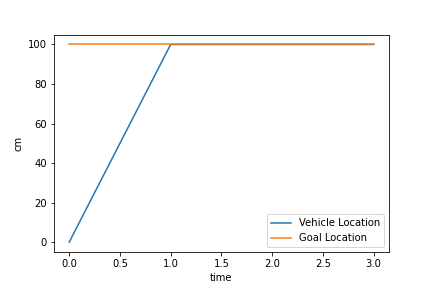

In [37]:
controlCar(initialPosition=0, # car initial position
                referencePosition=100, # car goal position
                KProportional=173, # P Constant
                samplePeriodInSeconds=0.01, # how long the P-controller should wait before generating a new value
                howLong = 3,    # how long this simulation should run
                clockTickStep=0.2, # duration of one simulated clock "tick"
                minPow=20,  # for the car  - see above
                maxPow=100) # for the car - see above)